# Model Optimization

We can use characteristics of our input data to determine what parameters should be changed.

There are a few means of optimizing a neural network:

* Check out the input dataset.
* Add more neurons to a hidden layer.
* Add additional hidden layers.
* Use a different activation function for the hidden layers.
* Add additional epochs to the training regimen.

The input dataset will be re-examined to add "NAME" which was dropped from the intial model for simplicity

An additional hidden layer will be added (making this a deep learning model as it will 3 hidden layers)

If the benchmark is not achieved additional epochs will be added (only if needed)

## Preprocessing the Data for the Optimized Neural Network

In [1]:
# import common libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")


In [2]:
# Import dependencies from sklearn
import sklearn as skl
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder

In [3]:
# import dependencies from tensorflow
import tensorflow as tf

Read in the charity_data.csv to a Pandas DataFrame, and be sure to identify the following in your dataset:

* What variable is considered the target for your model?
the target variable is IS_SUCCESSFUL

* What variable(s) are considered the feature(s) for your model?
The following are all part of the features maxtrix (X)
1. APPLICATION_TYPE
2. AFFILIATION
3. CLASSIFICATION
4. USE_CASE
5. ORGANIZATION
6. STATUS
7. INCOME_AMT
8. SPECIAL_CONSIDERATIONS
9. ASK_AMT

Note: the pwd was somehow starting in the wrong folder which caused an error in importing a csv file from the "Resources" folder
this was remedied by changing the current working directory

In [4]:
pwd


'C:\\Users\\jamie\\Tutoring\\Jamie_Homework\\Module_3\\Neural_Network_Charity_Analysis'

In [5]:
# cd ..


## Checkout the Input Data

Adjusting the input data to ensure that there are no variables or outliers that are causing confusion in the model, such as:
* Dropping more or fewer columns.
* Creating more bins for rare occurrences in columns.
* Increasing or decreasing the number of values for each bin.Adjusting the input data to ensure that there are no variables or outliers that are causing confusion in the model, such as:
* Dropping more or fewer columns.
* Creating more bins for rare occurrences in columns.
* Increasing or decreasing the number of values for each bin.


In [6]:
#  Import and read the charity_data.csv.
application_df = pd.read_csv("./Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,Jan-99,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


### Data Dictionary:

* EIN and NAME—Identification columns
* APPLICATION_TYPE—Alphabet Soup application type
* AFFILIATION—Affiliated sector of industry
* CLASSIFICATION—Government organization classification
* USE_CASE—Use case for funding
* ORGANIZATION—Organization type
* STATUS—Active status
* INCOME_AMT—Income classification
* SPECIAL_CONSIDERATIONS—Special consideration for application
* ASK_AMT—Funding amount requested
* IS_SUCCESSFUL—Was the money used effectively

In [7]:
# explore the data
application_df.info() # 12 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   EIN                     34299 non-null  int64 
 1   NAME                    34299 non-null  object
 2   APPLICATION_TYPE        34299 non-null  object
 3   AFFILIATION             34299 non-null  object
 4   CLASSIFICATION          34299 non-null  object
 5   USE_CASE                34299 non-null  object
 6   ORGANIZATION            34299 non-null  object
 7   STATUS                  34299 non-null  int64 
 8   INCOME_AMT              34299 non-null  object
 9   SPECIAL_CONSIDERATIONS  34299 non-null  object
 10  ASK_AMT                 34299 non-null  int64 
 11  IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 3.1+ MB


In [8]:
# check the mix of the target variable
application_df["IS_SUCCESSFUL"].value_counts()

# there appears to be a good mix of successful and not successful applications

1    18261
0    16038
Name: IS_SUCCESSFUL, dtype: int64

<AxesSubplot:>

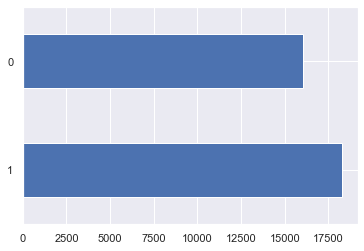

In [9]:
# visualize "IS_SUCCESSFUL" mix
application_df["IS_SUCCESSFUL"].value_counts().plot.barh()

In [10]:
# Look at CLASSIFICATION value counts for binning
classification_type = application_df["CLASSIFICATION"].value_counts()
classification_type

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

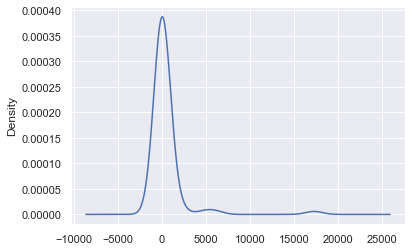

In [11]:
# Visualize the value counts of CLASSIFICATION
classification_type.plot.density()

In [12]:
# Determine which values to replace
replace_classification_type = list(classification_type[classification_type < 500].index)

# Replace in DataFrame
for classification_type in replace_classification_type:
    application_df["CLASSIFICATION"] = application_df["CLASSIFICATION"].replace(classification_type, "Other")
    
# check to make sure binning was successful
application_df["CLASSIFICATION"].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1484
C7000      777
Name: CLASSIFICATION, dtype: int64

<AxesSubplot:ylabel='Density'>

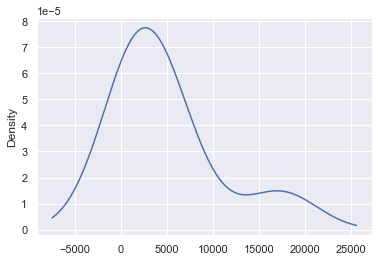

In [13]:
# Visualize the value counts of CLASSIFICATION after binning
application_df["CLASSIFICATION"].value_counts().plot.density()

In [14]:
# Look at APPLICATION_TYPE value counts for binning
application_type = application_df["APPLICATION_TYPE"].value_counts()
application_type

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

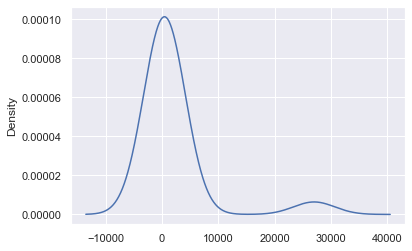

In [15]:
# Visualize the value counts of APPLICATION_TYPE
application_type.plot.density()

In [16]:
# Determine which values to replace
replace_application_type = list(application_type[application_type < 1000].index)

# Replace in DataFrame
for application_type in replace_application_type:
    application_df["APPLICATION_TYPE"] = application_df["APPLICATION_TYPE"].replace(application_type, "Other")
    
# check to make sure binning was successful
application_df["APPLICATION_TYPE"].value_counts()

T3       27037
Other     2266
T4        1542
T6        1216
T5        1173
T19       1065
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

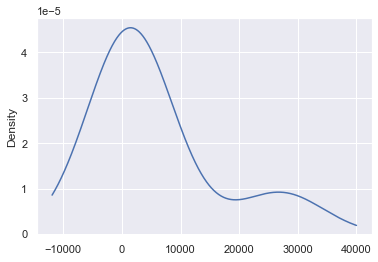

In [17]:
# Visualize the value counts of APPLICATION_TYPE after binning
application_df["APPLICATION_TYPE"].value_counts().plot.density()

# binning appears successful

## Re-examined to add "NAME" 

### "NAME" and "EIN" were not included in the inital model
Name will be examined in this optimization model

In [18]:
# Determine the number of unique values in the EIN column.
application_df['EIN'].nunique()

# EIN appears to be an index variable and will be dropped

34299

In [19]:
# Drop the non-beneficial ID columns, 'EIN'.
application_df.drop(columns= ["EIN"], inplace=True)
application_df.info() # 10 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   NAME                    34299 non-null  object
 1   APPLICATION_TYPE        34299 non-null  object
 2   AFFILIATION             34299 non-null  object
 3   CLASSIFICATION          34299 non-null  object
 4   USE_CASE                34299 non-null  object
 5   ORGANIZATION            34299 non-null  object
 6   STATUS                  34299 non-null  int64 
 7   INCOME_AMT              34299 non-null  object
 8   SPECIAL_CONSIDERATIONS  34299 non-null  object
 9   ASK_AMT                 34299 non-null  int64 
 10  IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(3), object(8)
memory usage: 2.9+ MB


In [20]:
# Look at NAME value counts for binning
Names = application_df["NAME"].value_counts()
Names.head(100) # the 100 most common names are all over 20

PARENT BOOSTER USA INC                                          1260
TOPS CLUB INC                                                    765
UNITED STATES BOWLING CONGRESS INC                               700
WASHINGTON STATE UNIVERSITY                                      492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                  408
                                                                ... 
DAUGHTERS OF ESTHER FELLOWSHIP INTERNATIONAL MINISTRIES INC       24
FUTURE FARMERS OF AMERICA STATE ASSOCIATIONS & LOCAL CHAPTER      24
INTERNATIONAL FEDERATION OF FLY FISHERS INC                       24
BETTER WORLD FUND                                                 23
DEPARTMENT OF WYOMING VFW AUXILIARY                               23
Name: NAME, Length: 100, dtype: int64

<AxesSubplot:ylabel='Density'>

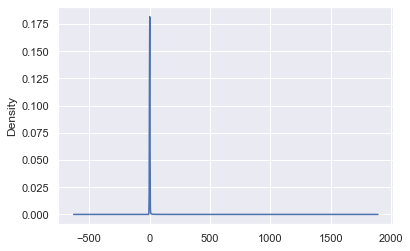

In [21]:
# Visualize the value counts of Names
Names.plot.density()

In [22]:
# Determine which values to replace (started with 20 then examined 10, then 5) kept 20 for simplicity
replace_Names = list(Names[Names < 20].index)

# Replace in DataFrame
for Names in replace_Names:
    application_df["NAME"] = application_df["NAME"].replace(Names, "Other")
    
# check to make sure binning was successful
application_df["NAME"].value_counts()

Other                                             22409
PARENT BOOSTER USA INC                             1260
TOPS CLUB INC                                       765
UNITED STATES BOWLING CONGRESS INC                  700
WASHINGTON STATE UNIVERSITY                         492
                                                  ...  
AMERICAN IRIS SOCIETY                                21
ARIZONA FEDERATION OF GARDEN CLUBS                   21
GENERAL FEDERATION OF WOMENS CLUBS ARIZONA INC       20
DISABLED AMERICAN VETERANS AUXILIARY INC             20
TEXAS MASTER GARDENER ASSOCIATION INC                20
Name: NAME, Length: 122, dtype: int64

<AxesSubplot:ylabel='Density'>

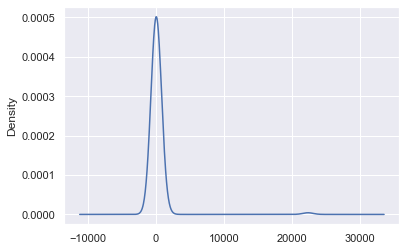

In [23]:
# Visualize the value counts of Names after binning (tried 20, 10 and 5 not very different)
application_df["NAME"].value_counts().plot.density()

In [24]:
# Generate our categorical variable list (having Dtype of "object")

application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_df[application_cat].nunique()

NAME                      122
APPLICATION_TYPE            6
AFFILIATION                 6
CLASSIFICATION              7
USE_CASE                    5
ORGANIZATION                4
INCOME_AMT                  9
SPECIAL_CONSIDERATIONS      2
dtype: int64

In [25]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,NAME_AIR FORCE ASSOCIATION,NAME_ALABAMA FEDERATION OF WOMENS CLUBS,NAME_ALABAMA TREASURE FOREST ASSOCIATION,NAME_ALPHA PHI SIGMA,NAME_ALPHA PHI SIGMA INC,NAME_ALTRUSA INTERNATIONAL FOUNDATION INC,NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES,NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES INC,NAME_AMERICAN ASSOCIATION OF UNIVERSITY WOMEN,NAME_AMERICAN ASSOCIATION OF UNIVERSITY WOMEN INC,...,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,INCOME_AMT_Jan-99,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [26]:
encode_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Columns: 161 entries, NAME_AIR FORCE ASSOCIATION to SPECIAL_CONSIDERATIONS_Y
dtypes: float64(161)
memory usage: 42.1 MB


In [28]:
encode_df.shape # much wider

(34299, 161)

Now that our categorical variables have been encoded, they are ready to replace our unencoded categorical variables in our dataset.

To replace these columns, we'll use a combination of Pandas' merge and drop methods. Add and run the following code in the notebook:

In [29]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat, axis= 1)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,NAME_AIR FORCE ASSOCIATION,NAME_ALABAMA FEDERATION OF WOMENS CLUBS,NAME_ALABAMA TREASURE FOREST ASSOCIATION,NAME_ALPHA PHI SIGMA,NAME_ALPHA PHI SIGMA INC,NAME_ALTRUSA INTERNATIONAL FOUNDATION INC,NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES,...,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,INCOME_AMT_Jan-99,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [30]:
# check that all columns are numeric
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Columns: 164 entries, STATUS to SPECIAL_CONSIDERATIONS_Y
dtypes: float64(161), int64(3)
memory usage: 42.9 MB


Note: all the dtypes are not numeric (float64)

In [31]:
# Split our preprocessed data into our features and target arrays
y= application_df["IS_SUCCESSFUL"].values

In [32]:
X= application_df.drop(["IS_SUCCESSFUL"], axis=1)
X

,STATUS,ASK_AMT,NAME_AIR FORCE ASSOCIATION,NAME_ALABAMA FEDERATION OF WOMENS CLUBS,NAME_ALABAMA TREASURE FOREST ASSOCIATION,NAME_ALPHA PHI SIGMA,NAME_ALPHA PHI SIGMA INC,NAME_ALTRUSA INTERNATIONAL FOUNDATION INC,NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES,NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES INC,...,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,INCOME_AMT_Jan-99,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,1,5000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,5000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34295,1,5000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34296,1,5000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34297,1,5000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [33]:
# Note columns will be used in visualizing results below
columns = X.columns
columns

Index(['STATUS', 'ASK_AMT', 'NAME_AIR FORCE ASSOCIATION',
       'NAME_ALABAMA FEDERATION OF WOMENS CLUBS',
       'NAME_ALABAMA TREASURE FOREST ASSOCIATION', 'NAME_ALPHA PHI SIGMA',
       'NAME_ALPHA PHI SIGMA INC', 'NAME_ALTRUSA INTERNATIONAL FOUNDATION INC',
       'NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES',
       'NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES INC',
       ...
       'INCOME_AMT_10000-24999', 'INCOME_AMT_100000-499999',
       'INCOME_AMT_10M-50M', 'INCOME_AMT_1M-5M', 'INCOME_AMT_25000-99999',
       'INCOME_AMT_50M+', 'INCOME_AMT_5M-10M', 'INCOME_AMT_Jan-99',
       'SPECIAL_CONSIDERATIONS_N', 'SPECIAL_CONSIDERATIONS_Y'],
      dtype='object', length=163)

In [34]:
X = X.values

In [35]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [36]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [38]:
# examine the result of StandardScaler
X_train_scaled

# note values now between -1 and 1
# this is important to note when selecting an activation function later

array([[ 0.01394306, -0.03348439, -0.05407486, ..., -0.14849557,
         0.02789425, -0.02789425],
       [ 0.01394306, -0.03348439, -0.05407486, ..., -0.14849557,
         0.02789425, -0.02789425],
       [ 0.01394306, -0.03348439, -0.05407486, ..., -0.14849557,
         0.02789425, -0.02789425],
       ...,
       [ 0.01394306, -0.03229417, -0.05407486, ..., -0.14849557,
         0.02789425, -0.02789425],
       [ 0.01394306, -0.03348439, -0.05407486, ..., -0.14849557,
         0.02789425, -0.02789425],
       [ 0.01394306, -0.01093629, -0.05407486, ..., -0.14849557,
         0.02789425, -0.02789425]])

In [40]:
# check the number of features in X
len(X_train[0])

# note this is important to note when selecting the number of neurons in a layer

163

### Add More Neurons and Hidden Layers
Some of the advantages follow:

* There is a distributed effort to find optimal weights—faster.
* Each neuron can focus on different features to identify nonlinear effects—smarter.
* It is less likely to fixate on complex variables—more robust.

A good rule of thumb for a basic neural network
is to have two to three times the amount of neurons in the hidden layer as the number of inputs.

### Use a Different Activation Function

It is important to use an activation function that matches the complexity of the input data. If we wanted to rank the four most-used activation functions by data complexity and ideal use case, the order would be as follows:

* The sigmoid function values are normalized to a probability between 0 and 1, which is ideal for binary classification (like our output layer).
* The tanh function can be used for classification or regression, and it expands the range between -1 and 1 (this is the range of our scaled data).
* The ReLU function is ideal for looking at positive nonlinear input data for classification or regression.
* The Leaky ReLU function is a good alternative for nonlinear input data with many negative inputs.

Based on the values in X_train_scaled I will change the activation= "tanh"


In [41]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
# this is done using the classes within the Keras module
number_input_features = X_train.shape[1]
hidden_nodes_layer1 = (number_input_features * 2)
hidden_nodes_layer2 = (number_input_features * 1)
hidden_nodes_layer3 = (number_input_features * 0.50)

nn_optimized = tf.keras.models.Sequential()

# First hidden layer
nn_optimized.add(
    tf.keras.layers.Dense(
        units=hidden_nodes_layer1, 
        input_dim=number_input_features, 
        activation="tanh")
)

# Second hidden layer
nn_optimized.add(tf.keras.layers.Dense(
    units=hidden_nodes_layer2, 
    activation="tanh")
)

# third hidden layer
nn_optimized.add(tf.keras.layers.Dense(
    units=hidden_nodes_layer3,
    activation="tanh"
))

# Output layer
nn_optimized.add(tf.keras.layers.Dense(
    units=1, 
    activation="sigmoid"
))

# Check the structure of the model
nn_optimized.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 326)               53464     
_________________________________________________________________
dense_1 (Dense)              (None, 163)               53301     
_________________________________________________________________
dense_2 (Dense)              (None, 81)                13284     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 82        
Total params: 120,131
Trainable params: 120,131
Non-trainable params: 0
_________________________________________________________________


Now that we have our training data ready, we can implement checkpoints to our deep learning model.

Now that we have our training data and our model defined, we're ready to compile and train our model using checkpoints. To use checkpoints, we need to define the checkpoint file name and directory path. For our purposes, we'll label our checkpoints by epoch number and contain them within their own folder. This ensures that our checkpoint files are neat, organized, and easily identifiable. Add and run the following code to our notebook:

In [42]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("optimized_checkpoints/",exist_ok=True)
checkpoint_path = "optimized_checkpoints/weights.{epoch:02d}.hdf5"

Once we have defined the file structure and filepath, we need to create a callback object for our deep learning model. A callback object is used in the Keras module to define a set of functions that will be applied at specific stages of the training process.There are a number of different callback functions available that can create log files, force training to stop, send training status messages, or in our case save model checkpoints. To create an effective checkpoint callback using the ModelCheckpoint method, we need to provide the following parameters:

* filepath=checkpoint_path—the checkpoint directory and file structure we defined previously
* verbose=1—we'll be notified when a checkpoint is being saved to the directory
* save_weights_only=True—saving the full model each time can fill up a hard drive very quickly; this ensures that the checkpoint files take up minimal space
* save_freq=1000—checkpoints will be saved every thousand samples tested (across all epochs)

Bringing it all together, we can compile, train, and evaluate our deep learning model by adding and running the following code:

Now it is time to compile our model and define the loss and accuracy metrics. Since we want to use our model as a binary classifier, we'll use the binary_crossentropy loss function, adam optimizer, and accuracy metrics. To compile the model, add and run the following code:

In [43]:
# Compile the model
nn_optimized.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [44]:
# creat a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose= 1,
    save_weights_only=True,
    save_freq=1000
)    

In [45]:
# Train the model
fit_model = nn_optimized.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 2s 2ms/step - loss: 0.4865 - accuracy: 0.7600
Epoch 2/100
804/804 [==============================] - 1s 1ms/step - loss: 0.4644 - accuracy: 0.7713
Epoch 3/100
804/804 [==============================] - 1s 2ms/step - loss: 0.4586 - accuracy: 0.7744
Epoch 4/100
804/804 [==============================] - 1s 1ms/step - loss: 0.4567 - accuracy: 0.7757
Epoch 5/100
804/804 [==============================] - 1s 2ms/step - loss: 0.4547 - accuracy: 0.7770
Epoch 6/100
804/804 [==============================] - 1s 2ms/step - loss: 0.4536 - accuracy: 0.7775
Epoch 7/100
804/804 [==============================] - 1s 2ms/step - loss: 0.4521 - accuracy: 0.7780
Epoch 8/100
804/804 [==============================] - 1s 2ms/step - loss: 0.4517 - accuracy: 0.7785
Epoch 9/100
804/804 [==============================] - 1s 2ms/step - loss: 0.4509 - accuracy: 0.7806
Epoch 10/100
804/804 [==============================] - 1s 2ms/step - loss: 0.4487 - accura

In [46]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_optimized.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.4734 - accuracy: 0.7724
Loss: 0.4733826816082001, Accuracy: 0.7723615169525146


<AxesSubplot:>

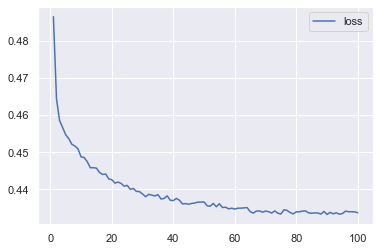

In [47]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

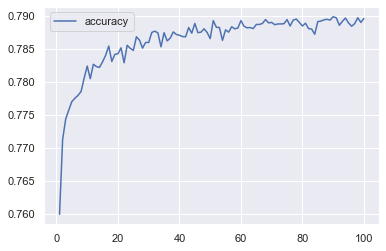

In [48]:
# Plot the accuracy
history_df.plot(y="accuracy")

## Model Assessment:
According to the accuracy metric of the neural network model was only able to correctly classify about 72% (slight improvement)

Loss: 0.591244101524353, Accuracy: 0.7230320572853088


### Use a Different Activation Function

It is important to use an activation function that matches the complexity of the input data. If we wanted to rank the four most-used activation functions by data complexity and ideal use case, the order would be as follows:

* The sigmoid function values are normalized to a probability between 0 and 1, which is ideal for binary classification (like our output classification)
* The tanh function can be used for classification or regression, and it expands the range between -1 and 1.
* The ReLU function is ideal for looking at positive nonlinear input data for classification or regression.
* The Leaky ReLU function is a good alternative for nonlinear input data with many negative inputs.

In [50]:
# export the fully trained model to HDF5 file
# note: The Hierarchical Data Format version 5 (HDF5), is an open source file format that supports large, complex, heterogeneous data. 

nn_optimized.save("./Trained_Models/AlphabetSoupCharity_Optimization.h5")
nn_optimized.save("./AlphabetSoupCharity_Optimization.h5")

In [51]:
# Evaluate the imported model using the test data
model_loss, model_accuracy = nn_optimized.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.4734 - accuracy: 0.7724
Loss: 0.4733826816082001, Accuracy: 0.7723615169525146


## Compare To Other Models

### Considering Accuracy vs. Interpretability (and resource requirements like time)

![Accuracy vs. Interpretability](./Resources/data-19-5-1-1-consider-trade-offs.png)

### Random Forest Vs. Deep Learning Model

Random forest classifiers are a type of ensemble learning model that combines multiple smaller models into a more robust and accurate model. Random forest models use a number of weak learner algorithms (decision trees) and combine their output to make a final classification (or regression) decision. Structurally speaking, random forest models are very similar to their neural network counterparts. Random forest models have been a staple in machine learning algorithms for many years due to their robustness and scalability. Both output and feature selection of random forest models are easy to interpret, and they can easily handle outliers and nonlinear data.

Random forest algorithms are beneficial because they:

* Are robust against overfitting as all of those weak learners are trained on different pieces of the data.
* Can be used to rank the importance of input variables in a natural way.
* Can handle thousands of input variables without variable deletion.
* Are robust to outliers and nonlinear data.
* Run efficiently on large datasets.

In [ ]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
# this is done using the classes within the Keras module
number_input_features = X_train.shape[1]
hidden_nodes_layer1 =  50
hidden_nodes_layer2 = 25

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(
        units=hidden_nodes_layer1, 
        input_dim=number_input_features, 
        activation="sigmoid")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(
    units=hidden_nodes_layer2, 
    activation="sigmoid")
)

# third hidden layer
nn.add(tf.keras.layers.Dense(
    units=hidden_nodes_layer3,
    activation="sigmoid"
))

# Output layer
nn.add(tf.keras.layers.Dense(
    units=1, 
    activation="sigmoid"
))

# Check the structure of the model
nn.summary()

In [53]:
# Import additional dependencies
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report

For our purposes, we'll use a random forest classifier with the n_estimators parameter set to 128. Typically, 128 estimators is the largest number of estimators we would want to use in a model. To create our random forest classifier model and test the performance, add and run the following code:

In [ ]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [55]:
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=128, random_state=78)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test_scaled)
print(f" Random forest predictive accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Random forest predictive accuracy: 0.759


In [56]:
# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[2648, 1355],
       [ 710, 3862]], dtype=int64)

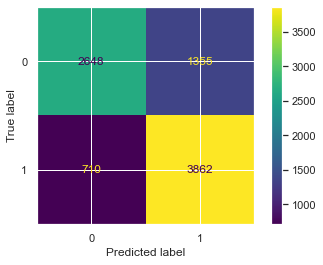

In [57]:
# display the confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels= rf_model.classes_)
disp.plot()
plt.savefig("./Resources/rf_confusion_matrix.png")
plt.show()

### Confusion matrix analysis:
The real risk (downside) is when a riskly loan ("IS_SUCCESSFUL" = 0) is labeled as a 1. That is the top right quadrant of the image above

There is also opportunity loss when a non-riskly loan ("IS_SUCCESSFUL" = 1) is labeled as a 0. That is the bottom left quadrant of the image above.

In [58]:
# print a classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.66      0.72      4003
           1       0.74      0.84      0.79      4572

    accuracy                           0.76      8575
   macro avg       0.76      0.75      0.75      8575
weighted avg       0.76      0.76      0.76      8575



In [59]:
# create feature importances from model
importances = rf_model.feature_importances_

# get column names
columns = columns

# create a dataframe
feature_importances_df = pd.DataFrame({
    'feature': columns,
    'importance': importances
}) 


feature_importance = feature_importances_df.sort_values(by=['importance'], ascending=False, inplace=True)
feature_importance = feature_importances_df.reset_index(drop=True, inplace=True)
feature_importance = feature_importances_df.head(10)
feature_importance

,feature,importance
0,ASK_AMT,0.301764
1,NAME_Other,0.102889
2,AFFILIATION_CompanySponsored,0.062945
3,AFFILIATION_Independent,0.052623
4,ORGANIZATION_Association,0.021922
5,NAME_TOASTMASTERS INTERNATIONAL,0.021196
6,APPLICATION_TYPE_T5,0.020626
7,NAME_MOST WORSHIPFUL STRINGER FREE AND ACCEPTE...,0.014603
8,CLASSIFICATION_C2000,0.014220
9,NAME_UNITED STATES BOWLING CONGRESS INC,0.014058


In [61]:
#We can sort all the features by their importance.
sorted(zip(rf_model.feature_importances_, columns), reverse=True)

[(0.30176370463119623, 'ASK_AMT'),
 (0.10288949166697545, 'NAME_Other'),
 (0.06294498620613155, 'AFFILIATION_CompanySponsored'),
 (0.05262260473398388, 'AFFILIATION_Independent'),
 (0.021922325027993624, 'ORGANIZATION_Association'),
 (0.021196202793729083, 'NAME_TOASTMASTERS INTERNATIONAL'),
 (0.020625523101986773, 'APPLICATION_TYPE_T5'),
 (0.014603140420912658,
  'NAME_MOST WORSHIPFUL STRINGER FREE AND ACCEPTED MASONS'),
 (0.014220430341869924, 'CLASSIFICATION_C2000'),
 (0.014057981065756736, 'NAME_UNITED STATES BOWLING CONGRESS INC'),
 (0.013860638602397706, 'NAME_TOPS CLUB INC'),
 (0.012741823816154626, 'ORGANIZATION_Trust'),
 (0.011195164966602394, 'CLASSIFICATION_C2100'),
 (0.011011135834670536, 'NAME_THE UNITED STATES PONY CLUBS INC'),
 (0.010408886872859686, 'APPLICATION_TYPE_Other'),
 (0.010003912285456851, 'CLASSIFICATION_C1000'),
 (0.00924502322830183, 'APPLICATION_TYPE_T19'),
 (0.009087709964396905, 'APPLICATION_TYPE_T4'),
 (0.00893083029569659, 'USE_CASE_Preservation'),
 (0

In [62]:
feature_importance['feature']

0                                              ASK_AMT
1                                           NAME_Other
2                         AFFILIATION_CompanySponsored
3                              AFFILIATION_Independent
4                             ORGANIZATION_Association
5                      NAME_TOASTMASTERS INTERNATIONAL
6                                  APPLICATION_TYPE_T5
7    NAME_MOST WORSHIPFUL STRINGER FREE AND ACCEPTE...
8                                 CLASSIFICATION_C2000
9              NAME_UNITED STATES BOWLING CONGRESS INC
Name: feature, dtype: object

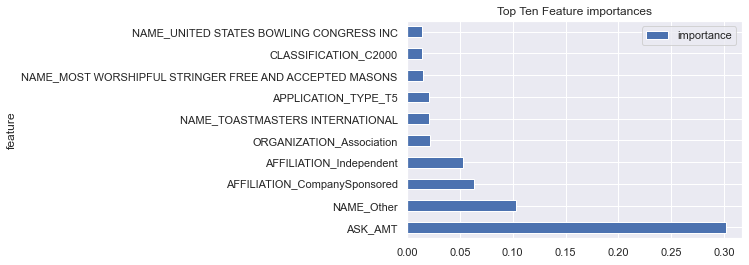

In [63]:
# visualize the top ten feature-importances_

feature_importance.plot.barh(x="feature", y="importance")
plt.title("Top Ten Feature importances")
plt.savefig("./Resources/rf_feature_importance.png")


### Model Performance Comparison:

Both model's predictive accuracy is very similar. Both the random forest and optimized deep learning model were able to predict correctly whether or not a loan will be successful over 75% of the time (exceeding the benchmark). 

Although their predictive performance was comparable, their implementation and training times were not the same. The random forest classifier was able to train on the large dataset and predict values in seconds, while the deep learning model required a couple minutes to train on the tens of thousands of data points. 

In other words, the random forest model is able to achieve comparable predictive accuracy on large tabular data with less code and faster performance. The ultimate decision of whether to use a random forest versus a neural network comes down to preference. 

Since AlphabetSoup Charity's dataset is tabular, a random forest classifier is the recommended model based on performance, speed, explainability and simplicity of setup.

In [ ]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

In [ ]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

In [ ]:
# Plot the accuracy
history_df.plot(y="accuracy")

### Add Additional Epochs to Training Regimen
change the epochs from 100 to 500 (takes longer to run but may generate a better model)

In [ ]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
# this is done using the classes within the Keras module
number_input_features = X_train.shape[1]
hidden_nodes_layer1 =  50
hidden_nodes_layer2 = 25

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(
        units=hidden_nodes_layer1, 
        input_dim=number_input_features, 
        activation="sigmoid")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(
    units=hidden_nodes_layer2, 
    activation="sigmoid")
)

# third hidden layer
nn.add(tf.keras.layers.Dense(
    units=hidden_nodes_layer3,
    activation="sigmoid"
))

# Output layer
nn.add(tf.keras.layers.Dense(
    units=1, 
    activation="sigmoid"
))

# Check the structure of the model
nn.summary()

In [ ]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=500)

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

In [ ]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

In [ ]:
# Plot the accuracy
history_df.plot(y="accuracy")